# ============================================
# CryptoCurrency Data Analysis (EDA)
# Project: Power BI Crypto Dashboard
# Author: Data Analyst
# Description:
# Exploratory Data Analysis based on
# CryptoCurrency dataset used in Power BI
# ============================================

In [4]:
%pip install xlrd==2.0.1


Note: you may need to restart the kernel to use updated packages.


In [6]:

# -------------------------------
# 1. Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# -------------------------------
# 2. Load Dataset
# -------------------------------
# Dataset path (Excel file)
file_path = "C:\\Users\\HP\\Desktop\\Cripto Currency dashboard power bi\\data\\CryptoData.xls"

# Read Excel file
df = pd.read_excel(file_path)

# Display first 5 rows
print("Dataset Preview:")
print(df.head().to_string())

Dataset Preview:
   SNo          Name Symbol                Date      High       Low      Open     Close    Volume   Marketcap
0    1  Binance Coin    BNB 2017-07-26 23:59:59  0.109013  0.099266  0.105893  0.105138  200395.0  10513800.0
1    2  Binance Coin    BNB 2017-07-27 23:59:59  0.108479  0.100888  0.105108  0.107737  344499.0  10773700.0
2    3  Binance Coin    BNB 2017-07-28 23:59:59  0.109019  0.101473  0.107632  0.104067  342568.0  10406700.0
3    4  Binance Coin    BNB 2017-07-29 23:59:59  0.111264  0.101108  0.104782  0.107811  340218.0  10781100.0
4    5  Binance Coin    BNB 2017-07-30 23:59:59  0.108138  0.103162  0.107935  0.106414  224261.0  10641400.0


In [8]:
# -------------------------------
# 3. Dataset Information
# -------------------------------
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17061 entries, 0 to 17060
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        17061 non-null  int64         
 1   Name       17061 non-null  object        
 2   Symbol     17061 non-null  object        
 3   Date       17061 non-null  datetime64[ns]
 4   High       17061 non-null  float64       
 5   Low        17061 non-null  float64       
 6   Open       17061 non-null  float64       
 7   Close      17061 non-null  float64       
 8   Volume     17061 non-null  float64       
 9   Marketcap  17061 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.3+ MB
None

Missing Values:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [11]:
# -------------------------------
# 4. Data Cleaning
# -------------------------------
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort values by date
df = df.sort_values('Date')

# Remove rows with missing essential values
df.dropna(subset=['Marketcap', 'Volume', 'Open', 'Close', 'High', 'Low'], inplace=True)

In [12]:
# -------------------------------
# 5. Summary Statistics
# -------------------------------
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                SNo                           Date          High  \
count  17061.000000                          17061  17061.000000   
mean    1269.439892  2018-01-15 13:26:32.318093824   1263.611384   
min        1.000000            2013-04-29 23:59:59      0.000089   
25%      610.000000            2016-05-01 23:59:59      0.005477   
50%     1219.000000            2018-03-06 23:59:59      0.247687   
75%     1893.000000            2019-11-05 23:59:59    156.848409   
max     2991.000000            2021-07-06 23:59:59  64863.098908   
std      775.381322                            NaN   5528.439101   

                Low          Open         Close        Volume     Marketcap  
count  17061.000000  17061.000000  17061.000000  1.706100e+04  1.706100e+04  
mean    1187.586666   1227.562309   1229.665361  3.185347e+09  2.951089e+10  
min        0.000079      0.000086      0.000086  0.000000e+00  7.714359e+05  
25%        0.005108      0.005263      0.005271  1.18

In [13]:
# -------------------------------
# 6. KPI Calculations (Dashboard Cards)
# -------------------------------
total_market_cap = df['Marketcap'].sum()
total_volume = df['Volume'].sum()
highest_price = df['High'].max()
lowest_price = df['Low'].min()
average_price = df['Close'].mean()

print("\nKPI Summary:")
print(f"Total Market Capital: {total_market_cap}")
print(f"Total Volume: {total_volume}")
print(f"Highest Price: {highest_price}")
print(f"Average Price: {average_price}")
print(f"Lowest Price: {lowest_price}")


KPI Summary:
Total Market Capital: 503485282425789.9
Total Volume: 54345203196863.73
Highest Price: 64863.0989077
Average Price: 1229.6653610148728
Lowest Price: 7.929980347398669e-05


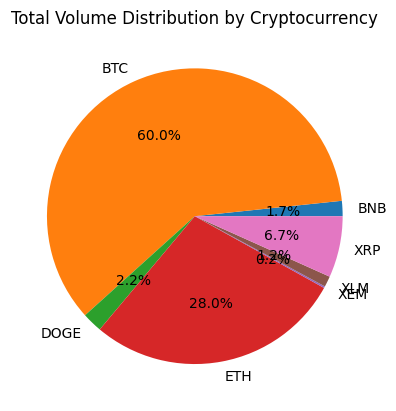

In [14]:
# -------------------------------
# 7. Volume Distribution by Cryptocurrency
# (Donut Chart in Power BI)
# -------------------------------
volume_by_crypto = df.groupby('Symbol')['Volume'].sum()

plt.figure()
plt.pie(volume_by_crypto, labels=volume_by_crypto.index, autopct='%1.1f%%')
plt.title("Total Volume Distribution by Cryptocurrency")
plt.show()

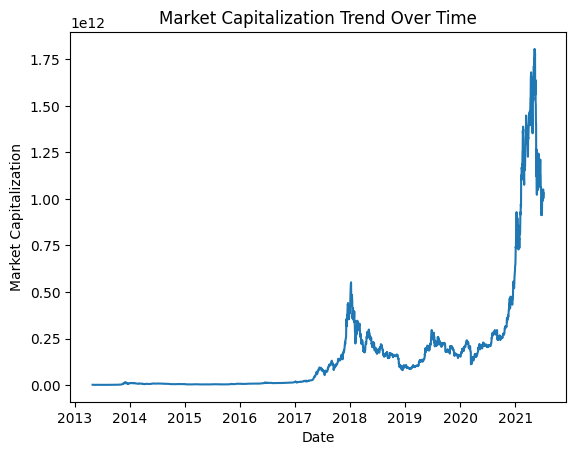

In [15]:
# -------------------------------
# 8. Market Capitalization Over Time
# (Area / Line Chart in Dashboard)
# -------------------------------
marketcap_by_date = df.groupby('Date')['Marketcap'].sum()

plt.figure()
plt.plot(marketcap_by_date.index, marketcap_by_date.values)
plt.xlabel("Date")
plt.ylabel("Market Capitalization")
plt.title("Market Capitalization Trend Over Time")
plt.show()

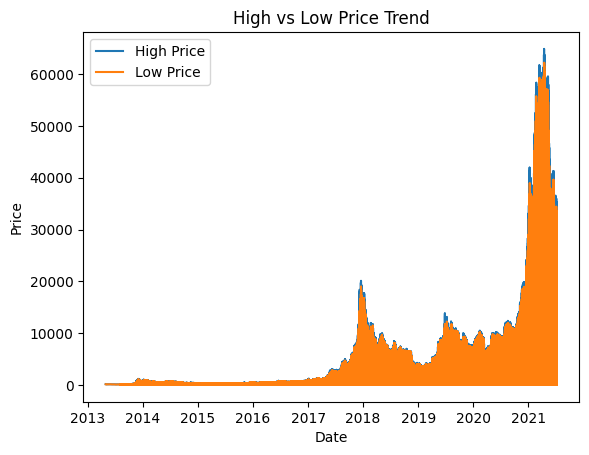

In [16]:
# -------------------------------
# 9. High vs Low Price Analysis
# -------------------------------
plt.figure()
plt.plot(df['Date'], df['High'], label="High Price")
plt.plot(df['Date'], df['Low'], label="Low Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High vs Low Price Trend")
plt.legend()
plt.show()

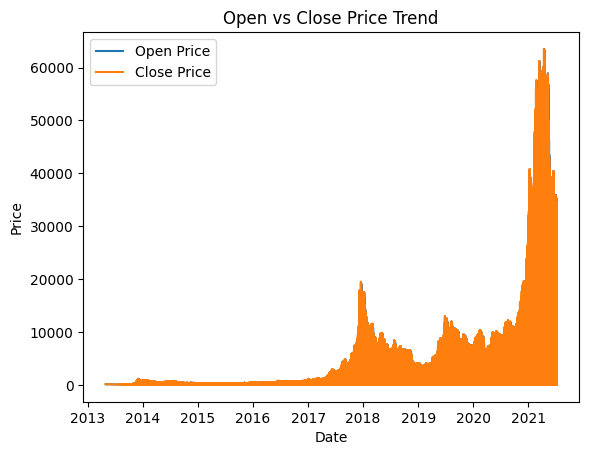

In [17]:
# -------------------------------
# 10. Open vs Close Price Analysis
# -------------------------------
plt.figure()
plt.plot(df['Date'], df['Open'], label="Open Price")
plt.plot(df['Date'], df['Close'], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open vs Close Price Trend")
plt.legend()
plt.show()

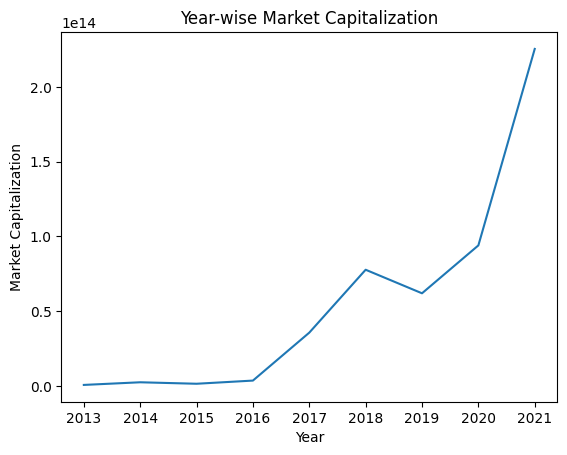

In [18]:
# -------------------------------
# 11. Year-wise Market Capital Analysis
# -------------------------------
df['Year'] = df['Date'].dt.year
yearly_marketcap = df.groupby('Year')['Marketcap'].sum()

plt.figure()
plt.plot(yearly_marketcap.index, yearly_marketcap.values)
plt.xlabel("Year")
plt.ylabel("Market Capitalization")
plt.title("Year-wise Market Capitalization")
plt.show()

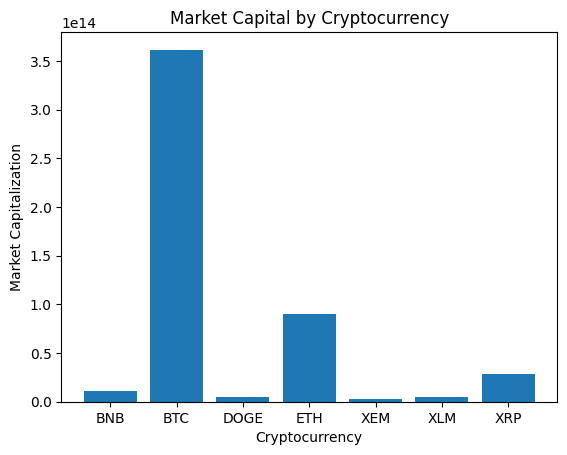

In [19]:
# -------------------------------
# 12. Cryptocurrency-wise Comparison
# -------------------------------
crypto_marketcap = df.groupby('Symbol')['Marketcap'].sum()

plt.figure()
plt.bar(crypto_marketcap.index, crypto_marketcap.values)
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Capitalization")
plt.title("Market Capital by Cryptocurrency")
plt.show()


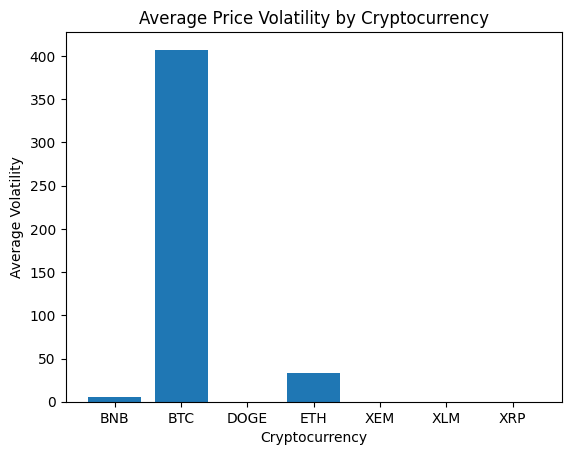

In [20]:
# -------------------------------
# 13. Volatility Analysis
# -------------------------------
df['Volatility'] = df['High'] - df['Low']
volatility_by_crypto = df.groupby('Symbol')['Volatility'].mean()

plt.figure()
plt.bar(volatility_by_crypto.index, volatility_by_crypto.values)
plt.xlabel("Cryptocurrency")
plt.ylabel("Average Volatility")
plt.title("Average Price Volatility by Cryptocurrency")
plt.show()


In [21]:
# -------------------------------
# 14. Key Insights (Console Output)
# -------------------------------
print("\nKey Insights:")
print("- Bitcoin shows dominance in market capitalization and volume.")
print("- Market growth accelerates significantly after 2017.")
print("- High volatility observed during peak market periods.")
print("- Market capitalization and volume show strong correlation.")


Key Insights:
- Bitcoin shows dominance in market capitalization and volume.
- Market growth accelerates significantly after 2017.
- High volatility observed during peak market periods.
- Market capitalization and volume show strong correlation.


In [22]:

# -------------------------------
# 15. Conclusion
# -------------------------------
print("\nConclusion:")
print(
    "This EDA provides a clear understanding of cryptocurrency market trends, "
    "price movements, and volume distribution. The insights generated here "
    "support the findings presented in the Power BI dashboard and help in "
    "data-driven decision making."
)



Conclusion:
This EDA provides a clear understanding of cryptocurrency market trends, price movements, and volume distribution. The insights generated here support the findings presented in the Power BI dashboard and help in data-driven decision making.
